In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import scienceplots

sys.path.append("../../../../../src/")
import nanonets_utils
import nanonets
# plt.style.use(["science","bright"])
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
MEAN_R_VALS = [30.0,40.0,50.0,75.0,100.0,150.0,200.0,300.0,400.0,500.0]
THREADS     = [0,1,2,3,4,5,6,7,8,9]
FOLDER      = '/home/j/j_mens07/phd/data/2_funding_period/current/res_disorder/two_resistances/'
N_E         = 8
INPUT_POS   = ['E1', 'E3']

In [4]:
data    = {}
R_dist  = {}

for R in MEAN_R_VALS:
    data_tmp    = []
    R_tmp       = []
    for seed in THREADS:
        path    = f'{FOLDER}Nx=9_Ny=9_Nz=1_Ne=8_R{R}_thread{seed}.csv'
        df      = pd.read_csv(path)
        df      = nanonets_utils.prepare_for_fitness_calculation(df.copy(), N_E, INPUT_POS)
        data_tmp.append(df.copy())

        try:
            R_arr   = np.loadtxt(f"{FOLDER}resistances_R{R}_thread{seed}.csv")
            R_tmp.append(R_arr.copy())
        except:
            pass
    data[R]     = data_tmp.copy()
    R_dist[R]   = R_tmp.copy()

In [5]:
NLS_list    = []
NDR_l_list  = []
NDR_r_list  = []

for R in MEAN_R_VALS:

    NDR_l_vals = [nanonets_utils.return_ndr(nanonets_utils.nonlinear_parameter(data[R][seed])['Ml']) for seed in THREADS]
    NDR_r_vals = [nanonets_utils.return_ndr(nanonets_utils.nonlinear_parameter(data[R][seed])['Mr']) for seed in THREADS]
    NLS_vals = [nanonets_utils.return_nls(nanonets_utils.nonlinear_parameter(data[R][seed])) for seed in THREADS]

    NDR_l_list.append(NDR_l_vals)
    NDR_r_list.append(NDR_r_vals)
    NLS_list.append(NLS_vals)

df_NLS      = pd.DataFrame(NLS_list, index=MEAN_R_VALS).T
df_NDR_l    = pd.DataFrame(NDR_l_list, index=MEAN_R_VALS).T
df_NDR_r    = pd.DataFrame(NDR_r_list, index=MEAN_R_VALS).T
df_NDR      = (df_NDR_l+df_NDR_r)/2

df_tmp1         = df_NDR.copy().melt(var_name='R', value_name='vals')
df_tmp1['Type'] = '$Q_{NDR}$'
df_tmp2         = df_NLS.copy().melt(var_name='R', value_name='vals')
df_tmp2['Type'] = '$Q_{NLS}$'
df_NONLINEAR    = pd.concat([df_tmp1,df_tmp2],ignore_index=True)

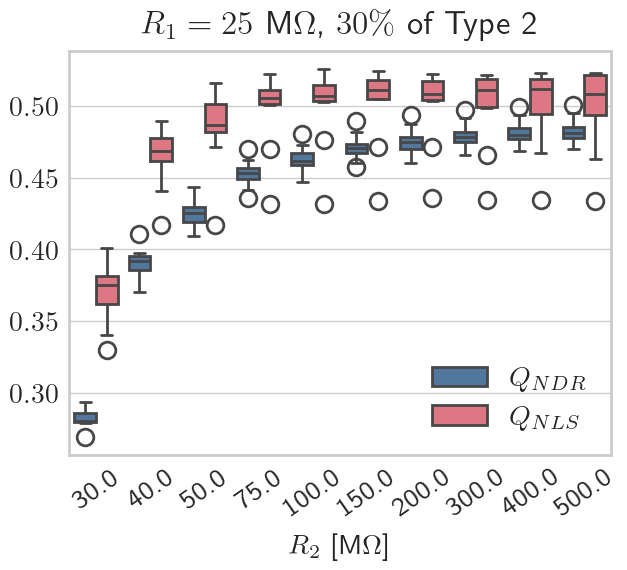

In [14]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.boxplot(data=df_NONLINEAR, x='R', y='vals', hue='Type',ax=ax)
ax.legend_.set_title("")
ax.set_title("$R_1 = 25$ M$\Omega$, $30 \%$ of Type 2")
ax.set_xlabel("$R_2$ [M$\Omega$]")
ax.set_ylabel("")
_ = plt.xticks(rotation=35)